### Modeling voltage threshold classification at 2.5 V using XGBoost with SELFIES, bianry data and molecular features (augmentation applied)

Feature Engineering: add SELFIES alphabet features and molecular features

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import saved files
train_df = pd.read_csv('train_df_Agmt_Rdkit.csv')
test_df = pd.read_csv('test_df_Agmt_Rdkit.csv')
augmented_df = pd.read_csv('augmented_df_All_Rdkit.csv')

In [4]:
augmented_df.shape

(1690, 2)

In [5]:
augmented_df.head()

,SMILES,Voltage
0,Clc1c([H])c([H])c(Cl)c2c1C(=O)C([H])=C([H])C2=O,2.663037
1,O=c1c(Cl)c([H])c(=O)c2c(=O)c(Cl)c(Cl)c(=O)c1=2,3.655935
2,[Li]OC(C1=C(C(O[Li])(O[Li])[H])SC(=C2SC(C(O[Li...,1.200000
3,Fc1c([H])c(S[Li])c(F)c([H])c1S[Li],2.400000
4,C(Oc1c(OC([H])([H])[H])c([H])c([H])c2c([H])c(O...,2.670670


In [6]:
train_df.head()

,Voltage,SMILES,smiles,Voltage_Binned
0,2.663037,Clc1ccc(Cl)c(c12)C(=O)C=CC2=O,O=C1C=CC(=O)c2c(Cl)ccc(Cl)c21,low
1,3.655935,O=c1c(Cl)cc(=O)c(c12)c(=O)c(Cl)c(Cl)c2=O,O=c1cc(Cl)c(=O)c2c(=O)c(Cl)c(Cl)c(=O)c1=2,high
2,1.200000,[Li]OC(C1=C(S/C(S1)=C2SC(C(O[Li])O[Li])=C(S/2)...,[Li]OC(O[Li])C1=C(C(O[Li])O[Li])SC(=C2SC(C(O[L...,very low
3,2.400000,FC(C=C1S[Li])=C(C=C1F)S[Li],[Li]Sc1cc(F)c(S[Li])cc1F,low
4,2.670670,COc1c(OC)ccc2cc(OC)c(c3c12)/C(=N/S(=O)(=O)C)/C...,COC1=C(OC)c2c(c(OC)cc3ccc(OC)c(OC)c23)C(=N/S(C...,low


In [7]:
train_df.shape

(1690, 4)

In [8]:
test_df.head()

,Voltage,SMILES,smiles,Voltage_Binned
0,2.140000,CC1=CC=CC2=C1C(C3=C(C(SC)=CC=C3)C2=O)=O,CSc1cccc2c1C(=O)c1cccc(C)c1C2=O,low
1,3.308668,CS(=O)(=O)/N=C(\C1Cl)/C(=N/S(=O)(=O)C)C=c(c=12...,CS(=O)(=O)/N=C1\C(Cl)=c2c(Cl)ccc(Cl)c2=C\C1=N/...,medium
2,2.270085,CS(=O)(=O)\N=C(C(=C1)N)\C(=N/S(=O)(=O)C)\c2c1c...,CS(=O)(=O)/N=C1C(=N\S(C)(=O)=O)\C(N)=Cc2cc(N)c...,low
3,3.700000,COC1=CC=C(C=C1)N2C3=CC4=C(N(C5=C4C=CC=C5)C6=CC...,COc1ccc(-n2c3ccccc3c3cc4c(cc32)c2ccccc2n4-c2cc...,high
4,3.029479,CS(=O)(=O)\N=C\1/C(=N/S(=O)(=O)C)C(F)=Cc2c1c(F...,CS(=O)(=O)/N=C1\C(F)=Cc2c(c(F)c(F)c3cc(F)cc(F)...,medium


In [9]:
test_df.shape

(725, 4)

In [10]:
# Delete 'Voltage_Binned' and 'smiles' columns from both train_df and test_df
train_df = train_df.drop(columns=['Voltage_Binned','smiles'])
test_df = test_df.drop(columns=['Voltage_Binned','smiles'])

In [11]:

# Step 3: Merge augmented data with original train data and test data
augmented_df['Augmented'] = 1
train_df['Augmented'] = 1
test_df['Augmented'] = 0
df_All_augmented = pd.concat([augmented_df,train_df, test_df], ignore_index=True)


In [12]:
df_All_augmented.head()

,SMILES,Voltage,Augmented
0,Clc1c([H])c([H])c(Cl)c2c1C(=O)C([H])=C([H])C2=O,2.663037,1
1,O=c1c(Cl)c([H])c(=O)c2c(=O)c(Cl)c(Cl)c(=O)c1=2,3.655935,1
2,[Li]OC(C1=C(C(O[Li])(O[Li])[H])SC(=C2SC(C(O[Li...,1.200000,1
3,Fc1c([H])c(S[Li])c(F)c([H])c1S[Li],2.400000,1
4,C(Oc1c(OC([H])([H])[H])c([H])c([H])c2c([H])c(O...,2.670670,1


In [13]:
df_All_augmented.shape

(4105, 3)

In [14]:
df_All_augmented = df_All_augmented.drop_duplicates(subset='SMILES', keep='first')

In [15]:
df_All_augmented.shape

(4090, 3)

In [16]:
df_All = df_All_augmented.copy()

In [17]:
df_All.shape

(4090, 3)

### Exploratory Data Analysis (EDA)

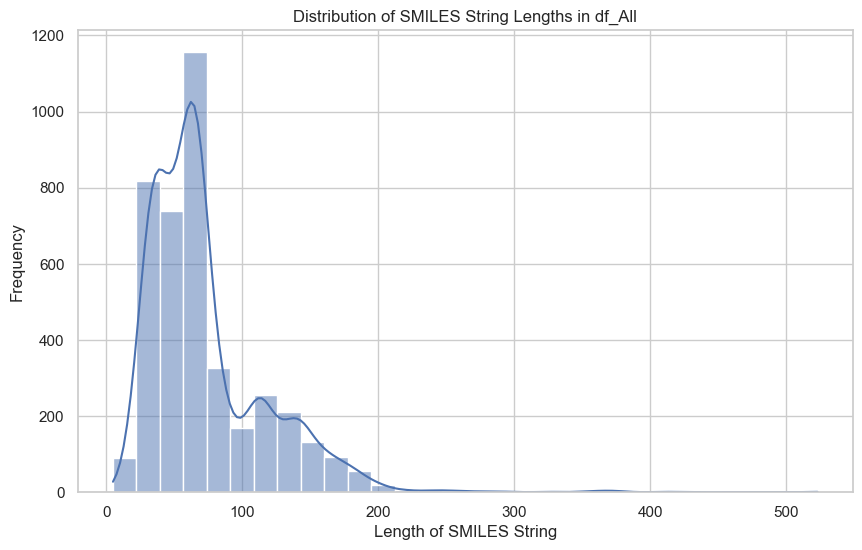

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each SMILES string
df_All['length'] = df_All['SMILES'].apply(len)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df_All['length'], bins=30, kde=True)

# Set the plot title and labels
plt.title('Distribution of SMILES String Lengths in df_All')
plt.xlabel('Length of SMILES String')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [19]:
max_length_All = df_All['SMILES'].apply(len).max()

print("The maximum length of SMILES strings in the df_All DataFrame is:", max_length_All)

The maximum length of SMILES strings in the df_All DataFrame is: 523


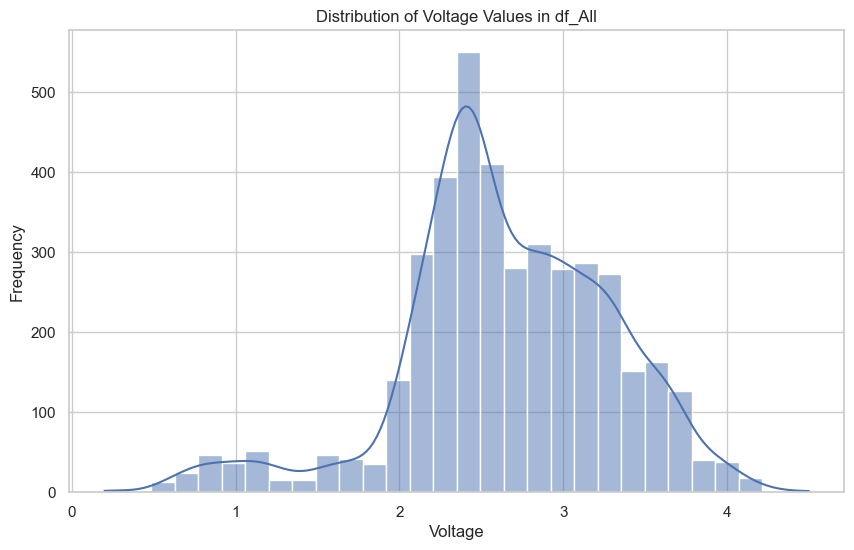

In [20]:
# Create the plot for Voltage distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_All['Voltage'], bins=30, kde=True)
plt.title('Distribution of Voltage Values in df_All')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Filter the DataFrame for voltage values greater than 2.5
high_voltage_df_All = df_All[df_All['Voltage'] > 2.5]

# Count the number of rows with voltage values greater than 2.5
num_high_voltage_All = high_voltage_df_All.shape[0]

percent_All = round((num_high_voltage_All/df_All.shape[0]) * 100, 2)

print(f"Number of voltage values in df_All greater than 2.5: {num_high_voltage_All}")
print(f"Percentage: {percent_All}%")

Number of voltage values in df_All greater than 2.5: 2268
Percentage: 55.45%


In [22]:
Voltage_threshold = 2.5

df_All['target'] = (df_All['Voltage'] > Voltage_threshold).astype(int)

In [23]:
df_All = df_All[df_All['length'] <= 250]

In [24]:
df_All.shape

(4073, 5)

In [25]:
df_All.head()

,SMILES,Voltage,Augmented,length,target
0,Clc1c([H])c([H])c(Cl)c2c1C(=O)C([H])=C([H])C2=O,2.663037,1,47,1
1,O=c1c(Cl)c([H])c(=O)c2c(=O)c(Cl)c(Cl)c(=O)c1=2,3.655935,1,46,1
2,[Li]OC(C1=C(C(O[Li])(O[Li])[H])SC(=C2SC(C(O[Li...,1.200000,1,97,0
3,Fc1c([H])c(S[Li])c(F)c([H])c1S[Li],2.400000,1,34,0
4,C(Oc1c(OC([H])([H])[H])c([H])c([H])c2c([H])c(O...,2.670670,1,178,1


In [26]:
# Reset the index of df_All after deleting columns
df_All = df_All.reset_index(drop=True)

# Sanitization - SELFIES - Encoding

In [27]:
import pandas as pd
import selfies as sf
from rdkit import Chem
from rdkit.Chem import MolToSmiles
from rdkit import RDLogger
from sklearn.base import BaseEstimator, TransformerMixin

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.error')

class SMILESToSELFIESTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pad_to_len=None):
        self.pad_to_len = pad_to_len
        self.symbol_to_idx = None
        self.idx_to_symbol = None

    def sanitize_smiles(self, smiles):
        try:
            # Replace '.' with 'X'
            smiles = smiles.replace('.', 'X')
            mol = Chem.MolFromSmiles(smiles, sanitize=True)
            if mol is not None:
                return MolToSmiles(mol, canonical=True)
            else:
                return None
        except:
            return None

    def smiles_to_selfies(self, smiles):
        sanitized_smiles = self.sanitize_smiles(smiles)
        if sanitized_smiles:
            try:
                return sf.encoder(sanitized_smiles)
            except sf.EncoderError:
                return None
        return None

    def build_vocabulary(self, selfies_list):
        alphabet = sf.get_alphabet_from_selfies(selfies_list)
        alphabet.add("[nop]")  # [nop] is a special padding symbol
        self.alphabet = list(sorted(alphabet))
        self.symbol_to_idx = {s: i for i, s in enumerate(self.alphabet)}
        self.idx_to_symbol = {i: s for i, s in enumerate(self.alphabet)}

    def selfies_to_numerical(self, selfies):
        if not self.symbol_to_idx:
            raise ValueError("Vocabulary is not built. Call build_vocabulary first.")
        label, one_hot = sf.selfies_to_encoding(
            selfies=selfies,
            vocab_stoi=self.symbol_to_idx,
            pad_to_len=self.pad_to_len,
            enc_type="both"
        )
        return label

    def print_alphabet_list(self):
        if self.alphabet:
            print("Alphabet list:", self.alphabet)
        else:
            print("Alphabet list has not been built yet.")
    
    def fit(self, X, y=None):
        X = X.copy()
        # Convert SMILES to SELFIES
        X['selfies'] = X['smiles'].apply(self.smiles_to_selfies)
        
        # Filter out rows with invalid SELFIES
        X = X.dropna(subset=['selfies'])

        # Build vocabulary
        selfies_list = X['selfies'].tolist()
        self.build_vocabulary(selfies_list)

        # Determine pad_to_len if not specified
        if self.pad_to_len is None:
            self.pad_to_len = max(sf.len_selfies(s) for s in selfies_list)
        
        return self

    def transform(self, X, y=None):
        X = X.copy()
        # Convert SMILES to SELFIES (if not already done in fit)
        if 'selfies' not in X.columns:
            X['selfies'] = X['smiles'].apply(self.smiles_to_selfies)
        
        # Filter out rows with invalid SELFIES
        X = X.dropna(subset=['selfies'])

        # Convert SELFIES to numerical IDs
        X['numerical_ids'] = X['selfies'].apply(self.selfies_to_numerical)
        
        #return X[['numerical_ids']]

        # Convert the list of numerical IDs into a DataFrame
        numerical_ids_df = pd.DataFrame(X['numerical_ids'].tolist())
        
        return numerical_ids_df

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)


In [28]:
# Show full length
pd.set_option('display.max_colwidth', None)

#### IDs for df_All

In [29]:
df_trans_All = pd.DataFrame()
df_trans_All['smiles'] = df_All['SMILES']
trans_All = SMILESToSELFIESTransformer()
IDs_All = trans_All.fit_transform(df_trans_All)

In [30]:
df_trans_All = pd.DataFrame()
df_trans_All['smiles'] = df_All['SMILES']  # Copy the 'SMILES' column

# Transformer that converts SMILES to SELFIES IDs
trans_All = SMILESToSELFIESTransformer()

# Perform the transformation
IDs_All = trans_All.fit_transform(df_trans_All)

# Add the 'smiles' column to IDs_All
IDs_All['smiles'] = df_trans_All['smiles']


In [31]:
IDs_All.head()

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,smiles
0,38,12,26,12,26,10,26,15,26,12,...,49,49,49,49,49,49,49,49,49,Clc1c([H])c([H])c(Cl)c2c1C(=O)C([H])=C([H])C2=O
1,38,12,26,12,22,26,27,26,10,26,...,49,49,49,49,49,49,49,49,49,O=c1c(Cl)c([H])c(=O)c2c(=O)c(Cl)c(Cl)c(=O)c1=2
2,30,38,26,22,40,38,30,26,12,22,...,49,49,49,49,49,49,49,49,49,[Li]OC(C1=C(C(O[Li])(O[Li])[H])SC(=C2SC(C(O[Li])(O[Li])[H])=C(C(O[Li])(O[Li])[H])S2)S1)(O[Li])[H]
3,30,43,26,12,26,22,26,28,12,22,...,49,49,49,49,49,49,49,49,49,Fc1c([H])c(S[Li])c(F)c([H])c1S[Li]
4,26,38,26,12,22,40,38,26,26,12,...,49,49,49,49,49,49,49,49,49,C(Oc1c(OC([H])([H])[H])c([H])c([H])c2c([H])c(OC([H])([H])[H])c3c(c12)C(OC([H])([H])[H])=C(OC([H])([H])[H])C(=N\S(=O)(=O)C([H])([H])[H])/C3=N\S(=O)(=O)C([H])([H])[H])([H])([H])[H]


In [32]:
# Retrieve the calculated pad_to_len
print("Computed pad_to_len:", trans_All.pad_to_len)

Computed pad_to_len: 175


In [33]:
IDs_All.shape

(4073, 176)

In [34]:
# Call print_alphabet_list() to print the alphabet list
trans_All.print_alphabet_list()

Alphabet list: ['[#Branch1]', '[#Branch2]', '[#C]', '[#N]', '[-\\Ring1]', '[-\\Ring2]', '[/C]', '[/N]', '[/O]', '[/S]', '[=Branch1]', '[=Branch2]', '[=C]', '[=N+1]', '[=N]', '[=O]', '[=P]', '[=Ring1]', '[=Ring2]', '[=S]', '[B]', '[Br]', '[Branch1]', '[Branch2]', '[C@@H1]', '[C@H1]', '[C]', '[Cl]', '[F]', '[I]', '[Li]', '[N+1]', '[N-1]', '[NH1]', '[N]', '[Na]', '[O-1]', '[OH0]', '[O]', '[P]', '[Ring1]', '[Ring2]', '[S+1]', '[S]', '[\\C]', '[\\F]', '[\\N]', '[\\O]', '[\\S]', '[nop]']


In [35]:
trans_All.fit(df_trans_All)

SMILESToSELFIESTransformer(pad_to_len=175)

In [36]:
# Print the mapping from numerical IDs to SELFIES tokens
print("Numerical ID to Token mapping for df_All:")
for idx, token in trans_All.idx_to_symbol.items():
    print(f"ID {idx}: {token}")

Numerical ID to Token mapping for df_All:
ID 0: [#Branch1]
ID 1: [#Branch2]
ID 2: [#C]
ID 3: [#N]
ID 4: [-\Ring1]
ID 5: [-\Ring2]
ID 6: [/C]
ID 7: [/N]
ID 8: [/O]
ID 9: [/S]
ID 10: [=Branch1]
ID 11: [=Branch2]
ID 12: [=C]
ID 13: [=N+1]
ID 14: [=N]
ID 15: [=O]
ID 16: [=P]
ID 17: [=Ring1]
ID 18: [=Ring2]
ID 19: [=S]
ID 20: [B]
ID 21: [Br]
ID 22: [Branch1]
ID 23: [Branch2]
ID 24: [C@@H1]
ID 25: [C@H1]
ID 26: [C]
ID 27: [Cl]
ID 28: [F]
ID 29: [I]
ID 30: [Li]
ID 31: [N+1]
ID 32: [N-1]
ID 33: [NH1]
ID 34: [N]
ID 35: [Na]
ID 36: [O-1]
ID 37: [OH0]
ID 38: [O]
ID 39: [P]
ID 40: [Ring1]
ID 41: [Ring2]
ID 42: [S+1]
ID 43: [S]
ID 44: [\C]
ID 45: [\F]
ID 46: [\N]
ID 47: [\O]
ID 48: [\S]
ID 49: [nop]


#### Save and reuse embeddings

Using the same embedding, alphabet list, length, and padding from your trained SMILESToSELFIESTransformer class for screening molecules in a database

Save the Fitted Transformer Information: After fitting the transformer on your current dataset, save the vocabulary (symbol_to_idx, idx_to_symbol), alphabet, and pad_to_len. This ensures consistency when transforming the SMILES data from the new database.

In [37]:
import pickle

# After fitting the transformer
transformer = SMILESToSELFIESTransformer(pad_to_len=175)
transformer.fit(df_trans_All)

# Save the transformer state
with open('transformer_state.pkl', 'wb') as f:
    pickle.dump({
        'symbol_to_idx': transformer.symbol_to_idx,
        'idx_to_symbol': transformer.idx_to_symbol,
        'alphabet': transformer.alphabet,
        'pad_to_len': transformer.pad_to_len
    }, f)


Load the Fitted Transformer Information: When applying the transformer to the new dataset (e.g., the database of molecules), load the saved transformer state and use the same settings (vocabulary, padding length, etc.).

In [37]:
'''
# Load the transformer state
with open('transformer_state.pkl', 'rb') as f:
    state = pickle.load(f)

# Initialize transformer with saved state
transformer = SMILESToSELFIESTransformer(pad_to_len=state['pad_to_len'])
transformer.symbol_to_idx = state['symbol_to_idx']
transformer.idx_to_symbol = state['idx_to_symbol']
transformer.alphabet = state['alphabet']

# Transform the new database (df_new)
df_new_numerical_ids = transformer.transform(df_new)

'''

"\n# Load the transformer state\nwith open('transformer_state.pkl', 'rb') as f:\n    state = pickle.load(f)\n\n# Initialize transformer with saved state\ntransformer = SMILESToSELFIESTransformer(pad_to_len=state['pad_to_len'])\ntransformer.symbol_to_idx = state['symbol_to_idx']\ntransformer.idx_to_symbol = state['idx_to_symbol']\ntransformer.alphabet = state['alphabet']\n\n# Transform the new database (df_new)\ndf_new_numerical_ids = transformer.transform(df_new)\n\n"

In [37]:
IDs_All.shape

(4073, 176)

Given that the IDs_All dataframe has 175 columns (with column names ranging from 0 to 174), and it contains padded SMILES numerical IDs, we can modify the code to work directly with this dataframe. The goal is to create binary features based on whether any of the numerical IDs (from 0 to 48) appear in each row of IDs_All.

In [38]:
# Alphabet list size (0 to 48)
alphabet_size = 49

# Initialize a new DataFrame to store the binary features (columns: 0 to 48)
binary_features_df = pd.DataFrame(0, index=IDs_All.index, columns=range(alphabet_size))

# Function to create a binary vector for each row in IDs_All
def create_binary_vector(row, alphabet_size):
    binary_vector = [0] * alphabet_size
    for num_id in row:
        if isinstance(num_id, int) and 0 <= num_id < alphabet_size:  # Ensure only numeric IDs are considered
            binary_vector[num_id] = 1
    return binary_vector

# Apply the function to each row of IDs_All, excluding the 'smiles' column
for idx, row in IDs_All.drop(columns=['smiles']).iterrows():
    binary_features_df.loc[idx] = create_binary_vector(row, alphabet_size)



In [39]:
binary_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,0,0,0


In [40]:
binary_features_df.shape

(4073, 49)

In [41]:
# Alphabet list from 0 to 48, corresponding to the numerical IDs
alphabet_list = ['[#Branch1]', '[#Branch2]', '[#C]', '[#N]', '[-\\Ring1]', '[-\\Ring2]', '[/C]', '[/N]', '[/O]', '[/S]', 
                 '[=Branch1]', '[=Branch2]', '[=C]', '[=N+1]', '[=N]', '[=O]', '[=P]', '[=Ring1]', '[=Ring2]', '[=S]',
                 '[B]', '[Br]', '[Branch1]', '[Branch2]', '[C@@H1]', '[C@H1]', '[C]', '[Cl]', '[F]', '[I]', '[Li]', 
                 '[N+1]', '[N-1]', '[NH1]', '[N]', '[Na]', '[O-1]', '[OH0]', '[O]', '[P]', '[Ring1]', '[Ring2]', 
                 '[S+1]', '[S]', '[\\C]', '[\\F]', '[\\N]', '[\\O]', '[\\S]']

# Assign the alphabet_list as the column names for binary_features_df
binary_features_df.columns = alphabet_list


In [42]:
binary_features_df.head()

,[#Branch1],[#Branch2],[#C],[#N],[-\Ring1],[-\Ring2],[/C],[/N],[/O],[/S],...,[P],[Ring1],[Ring2],[S+1],[S],[\C],[\F],[\N],[\O],[\S]
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,0,0,0


In [43]:
IDs_All = pd.concat([IDs_All, binary_features_df], axis=1)

# Convert all column names to strings
IDs_All.columns = IDs_All.columns.astype(str)

# Now, the column names are all strings and compatible with ML libraries


In [44]:
IDs_All.shape

(4073, 225)

In [45]:
# Assign 'Augmented' and 'target' columns from df_All to IDs_All
IDs_All[['Augmented', 'target']] = df_All[['Augmented', 'target']]


In [46]:
IDs_All.head()

,0,1,2,3,4,5,6,7,8,9,...,[Ring2],[S+1],[S],[\C],[\F],[\N],[\O],[\S],Augmented,target
0,38,12,26,12,26,10,26,15,26,12,...,0,0,0,0,0,0,0,0,1,1
1,38,12,26,12,22,26,27,26,10,26,...,0,0,1,0,0,0,0,0,1,1
2,30,38,26,22,40,38,30,26,12,22,...,1,0,1,0,0,0,0,0,1,0
3,30,43,26,12,26,22,26,28,12,22,...,0,0,1,0,0,0,0,0,1,0
4,26,38,26,12,22,40,38,26,26,12,...,1,0,1,0,0,0,0,0,1,1


### Molecular Features

In [47]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdchem

# Define the smiles_to_features function
def smiles_to_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    # Count the total number of atoms and bonds in the molecule
    num_atoms = mol.GetNumAtoms()
    num_bonds = mol.GetNumBonds()

    # Check if the molecule contains aromatic rings
    is_molecule_aromatic = any(atom.GetIsAromatic() for atom in mol.GetAtoms() if atom.IsInRing())

    # Check for conjugation
    is_conjugated = False
    for bond in mol.GetBonds():
        if bond.GetBondType() in (rdchem.BondType.DOUBLE, rdchem.BondType.AROMATIC):
            is_conjugated = True
            break

    # Atom features
    atom_features = {
        'avg_hybridization': sum([atom.GetHybridization() for atom in mol.GetAtoms()]) / num_atoms,
        'avg_num_hydrogens': sum([atom.GetTotalNumHs() for atom in mol.GetAtoms()]) / num_atoms
    }
    
    # Additional molecular properties
    molecular_weight = Descriptors.MolWt(mol)  # Molecular weight
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)  # Number of rotatable bonds
    num_rings = Descriptors.RingCount(mol)  # Number of rings

    # Count conjugated double bonds (for estimation purposes)
    degree_of_conjugation = sum(1 for bond in mol.GetBonds() if bond.GetBondType() in (rdchem.BondType.DOUBLE, rdchem.BondType.AROMATIC))

    return {
        # Atom features
        **atom_features,
        # Molecular features
        'num_atoms': num_atoms,
        'num_bonds': num_bonds,
        'is_molecule_aromatic': is_molecule_aromatic,
        'is_conjugated': is_conjugated,
        'molecular_weight': molecular_weight,
        'num_rotatable_bonds': num_rotatable_bonds,
        'num_rings': num_rings,
        'degree_of_conjugation': degree_of_conjugation,
    }


In [48]:
has_nan = IDs_All.isna().any().any()

print(f"Does IDs_All contain any NaN values? {has_nan}")

Does IDs_All contain any NaN values? False


In [49]:
# Apply the function to the DataFrame
IDs_All['features'] = IDs_All['smiles'].apply(smiles_to_features)

# Convert the 'features' dictionary into separate columns
mol_features_df = pd.json_normalize(IDs_All['features'])


In [50]:
mol_features_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,is_conjugated,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,3.142857,0.285714,14,15,True,True,227.046,0,2,9
1,3.176471,0.058824,17,18,True,True,291.473,0,2,15
2,3.000000,0.133333,30,31,False,True,435.930,12,2,3
3,3.000000,0.166667,12,12,True,True,190.094,2,1,6
4,3.264706,0.705882,34,36,True,True,512.562,7,3,18


In [51]:
# Convert boolean columns to numerical values (1 for True, 0 for False)
mol_features_df['is_molecule_aromatic'] = mol_features_df['is_molecule_aromatic'].astype(int)
mol_features_df['is_conjugated'] = mol_features_df['is_conjugated'].astype(int)

In [52]:
mol_features_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,is_conjugated,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,3.142857,0.285714,14,15,1,1,227.046,0,2,9
1,3.176471,0.058824,17,18,1,1,291.473,0,2,15
2,3.000000,0.133333,30,31,0,1,435.930,12,2,3
3,3.000000,0.166667,12,12,1,1,190.094,2,1,6
4,3.264706,0.705882,34,36,1,1,512.562,7,3,18


In [53]:
# Count how many molecules are not aromatic (is_molecule_aromatic == 0)
not_aromatic_count = (mol_features_df['is_molecule_aromatic'] == 0).sum()

# Print the count
print(f"Number of molecules that are not aromatic: {not_aromatic_count}")


Number of molecules that are not aromatic: 377


In [54]:
# Count how many molecules are not conjugated (is_conjugated == 0)
not_conjugated_count = (mol_features_df['is_conjugated'] == 0).sum()

# Print the count
print(f"Number of molecules that are not conjugated: {not_conjugated_count}")


Number of molecules that are not conjugated: 12


In [55]:
# Delete the 'is_conjugated' column from features_df
mol_features_df = mol_features_df.drop(columns=['is_conjugated'])


In [56]:
mol_features_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,3.142857,0.285714,14,15,1,227.046,0,2,9
1,3.176471,0.058824,17,18,1,291.473,0,2,15
2,3.000000,0.133333,30,31,0,435.930,12,2,3
3,3.000000,0.166667,12,12,1,190.094,2,1,6
4,3.264706,0.705882,34,36,1,512.562,7,3,18


In [57]:

# Drop the 'features' column if it's no longer needed
IDs_All.drop(columns=['features'], inplace=True)

In [58]:

# Concatenate the original DataFrame with the new features DataFrame
IDs_All = pd.concat([IDs_All, mol_features_df], axis=1)


In [59]:
IDs_All.head()

,0,1,2,3,4,5,6,7,8,9,...,target,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,38,12,26,12,26,10,26,15,26,12,...,1,3.142857,0.285714,14,15,1,227.046,0,2,9
1,38,12,26,12,22,26,27,26,10,26,...,1,3.176471,0.058824,17,18,1,291.473,0,2,15
2,30,38,26,22,40,38,30,26,12,22,...,0,3.000000,0.133333,30,31,0,435.930,12,2,3
3,30,43,26,12,26,22,26,28,12,22,...,0,3.000000,0.166667,12,12,1,190.094,2,1,6
4,26,38,26,12,22,40,38,26,26,12,...,1,3.264706,0.705882,34,36,1,512.562,7,3,18


### XGBoost

In [73]:
# Drop the 'smiles' column from IDs_All
IDs = IDs_All.drop(columns=['smiles'])


In [74]:
# Split IDs_All into train and test based on the 'Augmented' column
train_df = IDs[IDs['Augmented'] == 1]
test_df = IDs[IDs['Augmented'] == 0]

In [75]:
train_df.shape

(3349, 235)

In [76]:
test_df.shape

(724, 235)

In [7]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,target,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,38,12,26,12,26,10,26,15,26,12,...,1,3.142857,0.285714,14,15,1,227.046,0,2,9
1,38,12,26,12,22,26,27,26,10,26,...,1,3.176471,0.058824,17,18,1,291.473,0,2,15
2,30,38,26,22,40,38,30,26,12,22,...,0,3.000000,0.133333,30,31,0,435.930,12,2,3
3,30,43,26,12,26,22,26,28,12,22,...,0,3.000000,0.166667,12,12,1,190.094,2,1,6
4,26,38,26,12,22,40,38,26,26,12,...,1,3.264706,0.705882,34,36,1,512.562,7,3,18


In [8]:
# Define X_train as the feature columns (exclude 'target' and 'Augmented')
X_train_All = train_df.drop(columns=['target', 'Augmented'])

# Define y_train as the 'target' column
y_train_All = train_df['target']


In [9]:
# Define X_test as the feature columns (exclude 'target' and 'Augmented')
X_test_All = test_df.drop(columns=['target', 'Augmented'])

# Define y_test as the 'target' column
y_test_All = test_df['target']

In [10]:
X_train_All.head()

,0,1,2,3,4,5,6,7,8,9,...,[\S],avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,38,12,26,12,26,10,26,15,26,12,...,0,3.142857,0.285714,14,15,1,227.046,0,2,9
1,38,12,26,12,22,26,27,26,10,26,...,0,3.176471,0.058824,17,18,1,291.473,0,2,15
2,30,38,26,22,40,38,30,26,12,22,...,0,3.000000,0.133333,30,31,0,435.930,12,2,3
3,30,43,26,12,26,22,26,28,12,22,...,0,3.000000,0.166667,12,12,1,190.094,2,1,6
4,26,38,26,12,22,40,38,26,26,12,...,0,3.264706,0.705882,34,36,1,512.562,7,3,18


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, precision_score, roc_auc_score, accuracy_score


In [10]:
pipeline_xgb_All = Pipeline([
    ('scaler', StandardScaler()),            # Scale the numerical features
    ('model', XGBClassifier(random_state=42))
])

In [11]:
pipeline_xgb_All.fit(X_train_All, y_train_All)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [60]:
# Predict labels for both the train and test sets
y_train_pred_xgb_All = pipeline_xgb_All.predict(X_train_All)
y_test_pred_xgb_All = pipeline_xgb_All.predict(X_test_All)

# Predict probabilities for both the train and test sets to compute AUC-ROC
y_train_pred_proba_xgb_All = pipeline_xgb_All.predict_proba(X_train_All)[:, 1]  # Probability for class 1
y_test_pred_proba_xgb_All = pipeline_xgb_All.predict_proba(X_test_All)[:, 1]    # Probability for class 1

# Compute precision, AUC-ROC, and accuracy for the train set
train_precision_xgb_All = precision_score(y_train_All, y_train_pred_xgb_All)
train_auc_roc_xgb_All = roc_auc_score(y_train_All, y_train_pred_proba_xgb_All)
train_accuracy_xgb_All = accuracy_score(y_train_All, y_train_pred_xgb_All)

# Compute precision, AUC-ROC, and accuracy for the test set
test_precision_xgb_All = precision_score(y_test_All, y_test_pred_xgb_All)
test_auc_roc_xgb_All = roc_auc_score(y_test_All, y_test_pred_proba_xgb_All)
test_accuracy_xgb_All = accuracy_score(y_test_All, y_test_pred_xgb_All)

# Print the results for the train set
print("Train set scores:")
print(f"Precision: {train_precision_xgb_All:.4f}")
print(f"AUC-ROC: {train_auc_roc_xgb_All:.4f}")
print(f"Accuracy: {train_accuracy_xgb_All:.4f}\n")

# Print the results for the test set
print("Test set scores:")
print(f"Precision: {test_precision_xgb_All:.4f}")
print(f"AUC-ROC: {test_auc_roc_xgb_All:.4f}")
print(f"Accuracy: {test_accuracy_xgb_All:.4f}")

Train set scores:
Precision: 0.9914
AUC-ROC: 0.9999
Accuracy: 0.9931

Test set scores:
Precision: 0.8997
AUC-ROC: 0.9348
Accuracy: 0.8674


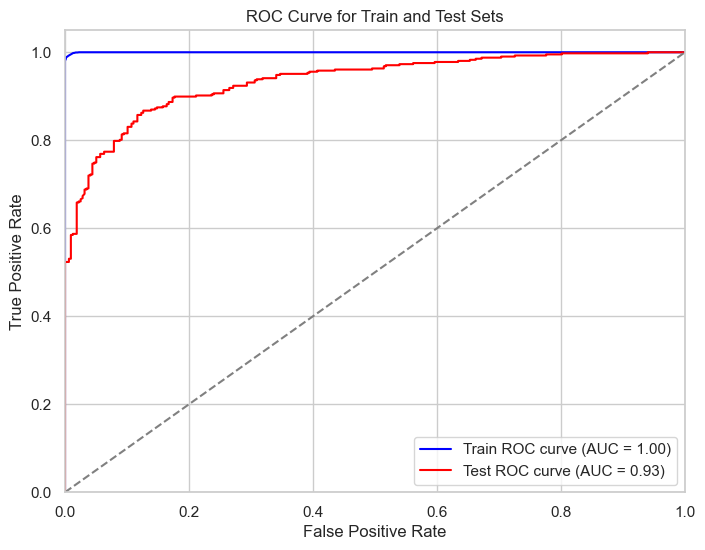

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for the training set
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train_All, y_train_pred_proba_xgb_All)
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)

# Compute ROC curve and AUC for the test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test_All, y_test_pred_proba_xgb_All)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# Plot ROC curves for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train_xgb:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='red', label=f'Test ROC curve (AUC = {roc_auc_test_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train and Test Sets')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


c:\Users\xueli\miniconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\xueli\miniconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


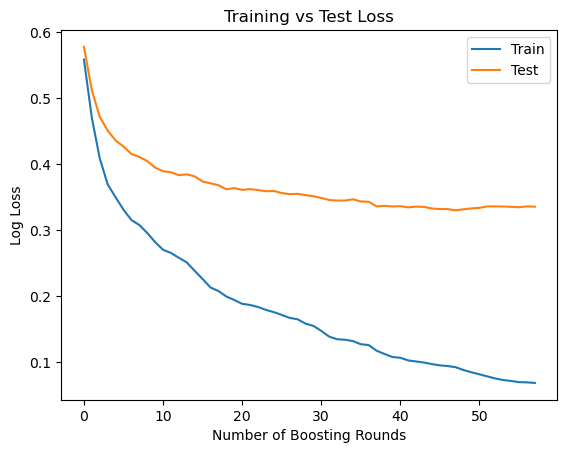

In [11]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_All)
X_test_scaled = scaler.transform(X_test_All)

# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Fit the model with early stopping and validation set
xgb_model.fit(
    X_train_scaled, y_train_All,
    eval_set=[(X_train_scaled, y_train_All), (X_test_scaled, y_test_All)],
    eval_metric='logloss',
    early_stopping_rounds=10,
    verbose=False
)

# Get the evaluation results
results_xgb = xgb_model.evals_result()

# Plot training and validation loss
plt.plot(results_xgb['validation_0']['logloss'], label='Train')
plt.plot(results_xgb['validation_1']['logloss'], label='Test')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.show()


### HyperOpt

##### Exhaustive Tuning with Hyperopt

In [3]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, roc_auc_score  

from typing import Any, Dict, Union

def hyperparameter_tuning(space: Dict[str, Union[float, int]], 
                    X_train: pd.DataFrame, y_train: pd.Series, 
                    X_test: pd.DataFrame, y_test: pd.Series, 
                    early_stopping_rounds: int=50,
                    metric:callable=accuracy_score) -> Dict[str, Any]:
    """
    Perform hyperparameter tuning for an XGBoost classifier.

    This function takes a dictionary of hyperparameters, training 
    and test data, and an optional value for early stopping rounds, 
    and returns a dictionary with the loss and model resulting from 
    the tuning process. The model is trained using the training 
    data and evaluated on the test data. The loss is computed as 
    the negative of the accuracy score.

    Parameters
    ----------
    space : Dict[str, Union[float, int]]
        A dictionary of hyperparameters for the XGBoost classifier.
    X_train : pd.DataFrame
        The training data.
    y_train : pd.Series
        The training target.
    X_test : pd.DataFrame
        The test data.
    y_test : pd.Series
        The test target.
    early_stopping_rounds : int, optional
        The number of early stopping rounds to use. The default value 
        is 50.
    metric : callable
        Metric to maximize. Default is accuracy

    Returns
    -------
    Dict[str, Any]
        A dictionary with the loss and model resulting from the 
        tuning process. The loss is a float, and the model is an 
        XGBoost classifier.
    """
    int_vals = ['max_depth', 'reg_alpha']
    space = {k: (int(val) if k in int_vals else val)
             for k,val in space.items()}
    space['early_stopping_rounds'] = early_stopping_rounds
    model = xgb.XGBClassifier(**space)
    evaluation = [(X_train, y_train),
                  (X_test, y_test)]
    model.fit(X_train, y_train,
              eval_set=evaluation, 
              verbose=False)    
         
    pred = model.predict(X_test)
    score = metric(y_test, pred)
    return {'loss': -score, 'status': STATUS_OK, 'model': model}

In [4]:
import xgboost as xgb

In [1]:
import networkx as nx

# Test if DiGraph works
try:
    G = nx.DiGraph()
    print("DiGraph created successfully!")
except AttributeError as e:
    print(f"Error: {e}")


DiGraph created successfully!


In [11]:
options = {'max_depth': hp.quniform('max_depth', 1, 8, 1),  # tree
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),   # stochastic
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 10),
    'gamma': hp.loguniform('gamma', -10, 10), # regularization
    'learning_rate': hp.loguniform('learning_rate', -7, 0),  # boosting
    'random_state': 42
}

trials = Trials()
best = fmin(fn=lambda space: hyperparameter_tuning(space, X_train_scaled, y_train_All, 
                                                   X_test_scaled, y_test_All),            
    space=options,           
    algo=tpe.suggest,            
    max_evals=2_000,            
    trials=trials,
    #timeout=60*5 # 5 minutes
)

100%|██████████| 2000/2000 [13:33<00:00,  2.46trial/s, best loss: -0.8825966850828729]


In [12]:
best_params = best.copy()

# Cast `max_depth` (quniform) to an integer
best_params['max_depth'] = int(best_params['max_depth'])

# Cast `min_child_weight` to a float, if needed
best_params['min_child_weight'] = float(best_params['min_child_weight'])

# The rest of the parameters are ready as they are
print("Processed Best Parameters:", best_params)


Processed Best Parameters: {'colsample_bytree': 0.9565872661604053, 'gamma': 0.03218108636380261, 'learning_rate': 0.38485312531245425, 'max_depth': 7, 'min_child_weight': 0.7727910700553221, 'reg_alpha': 1.540685733031966, 'reg_lambda': 2.8610738784539356, 'subsample': 0.9752723003642927}


In [13]:
xgb_best_model = XGBClassifier(
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    gamma=best_params['gamma'],
    learning_rate=best_params['learning_rate'],
    random_state=42,
    n_estimators=500  # Large number of estimators, early stopping will choose the best
)

# Train the best model with early stopping
xgb_best_model.fit(
    X_train_scaled, y_train_All,
    eval_set=[(X_train_scaled, y_train_All), (X_test_scaled, y_test_All)],  # Train and validation sets
    early_stopping_rounds=50,  # Stop if no improvement after 50 rounds
    verbose=True  # To monitor the early stopping process
)

# Best iteration can be accessed as:
print(f"Best iteration (number of trees used): {xgb_best_model.best_iteration + 1}")



[0]	validation_0-logloss:0.52367	validation_1-logloss:0.55276


[1]	validation_0-logloss:0.42020	validation_1-logloss:0.47528
[2]	validation_0-logloss:0.35404	validation_1-logloss:0.42345
[3]	validation_0-logloss:0.32986	validation_1-logloss:0.40668
[4]	validation_0-logloss:0.30236	validation_1-logloss:0.38368
[5]	validation_0-logloss:0.27661	validation_1-logloss:0.37765
[6]	validation_0-logloss:0.25736	validation_1-logloss:0.37333
[7]	validation_0-logloss:0.23617	validation_1-logloss:0.36494
[8]	validation_0-logloss:0.22036	validation_1-logloss:0.35929
[9]	validation_0-logloss:0.20916	validation_1-logloss:0.35669
[10]	validation_0-logloss:0.19293	validation_1-logloss:0.35101
[11]	validation_0-logloss:0.18591	validation_1-logloss:0.35141
[12]	validation_0-logloss:0.17212	validation_1-logloss:0.34447
[13]	validation_0-logloss:0.16215	validation_1-logloss:0.33921
[14]	validation_0-logloss:0.15037	validation_1-logloss:0.33280
[15]	validation_0-logloss:0.14773	validation_1-logloss:0.33202
[16]	validation_0-logloss:0.13915	validation_1-logloss:0.33604
[

c:\Users\xueli\miniconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-logloss:0.09222	validation_1-logloss:0.32908
[25]	validation_0-logloss:0.08786	validation_1-logloss:0.32886
[26]	validation_0-logloss:0.08426	validation_1-logloss:0.33015
[27]	validation_0-logloss:0.08147	validation_1-logloss:0.32877
[28]	validation_0-logloss:0.07891	validation_1-logloss:0.32795
[29]	validation_0-logloss:0.07649	validation_1-logloss:0.32728
[30]	validation_0-logloss:0.07404	validation_1-logloss:0.33088
[31]	validation_0-logloss:0.07124	validation_1-logloss:0.32992
[32]	validation_0-logloss:0.06969	validation_1-logloss:0.32952
[33]	validation_0-logloss:0.06807	validation_1-logloss:0.33068
[34]	validation_0-logloss:0.06605	validation_1-logloss:0.32941
[35]	validation_0-logloss:0.06419	validation_1-logloss:0.32861
[36]	validation_0-logloss:0.06264	validation_1-logloss:0.32894
[37]	validation_0-logloss:0.06121	validation_1-logloss:0.32740
[38]	validation_0-logloss:0.06028	validation_1-logloss:0.32661
[39]	validation_0-logloss:0.05899	validation_1-logloss:

In [14]:
# Retrieve the best number of estimators based on early stopping
best_n_estimators = xgb_best_model.best_iteration + 1  # Add 1 as it is 0-indexed

# Use the best n_estimators for final model training
final_model = XGBClassifier(
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    gamma=best_params['gamma'],
    learning_rate=best_params['learning_rate'],
    random_state=42,
    n_estimators=best_n_estimators  # Set to best iteration value
)

# Train the final model on the full dataset
final_model.fit(X_train_scaled, y_train_All)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9565872661604053, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.03218108636380261,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.38485312531245425,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=0.7727910700553221, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=39,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [15]:
from sklearn.metrics import precision_score, roc_auc_score, f1_score, accuracy_score

# Predict probabilities for AUC-ROC calculation
y_train_pred_prob = final_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Predict class labels
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

# Calculate metrics for the training set
train_precision = precision_score(y_train_All, y_train_pred)
train_auc_roc = roc_auc_score(y_train_All, y_train_pred_prob)
train_f1 = f1_score(y_train_All, y_train_pred)
train_accuracy = accuracy_score(y_train_All, y_train_pred)

# Calculate metrics for the test set
test_precision = precision_score(y_test_All, y_test_pred)
test_auc_roc = roc_auc_score(y_test_All, y_test_pred_prob)
test_f1 = f1_score(y_test_All, y_test_pred)
test_accuracy = accuracy_score(y_test_All, y_test_pred)

# Print metrics for both sets
print(f"Train Set Metrics:\nPrecision: {train_precision:.4f}\nAUC-ROC: {train_auc_roc:.4f}\nAccuracy: {train_accuracy:.4f}\nF1-Score: {train_f1:.4f}")
print("\n")
print(f"Test Set Metrics:\nPrecision: {test_precision:.4f}\nAUC-ROC: {test_auc_roc:.4f}\nAccuracy: {test_accuracy:.4f}\nF1-Score: {test_f1:.4f}")


Train Set Metrics:
Precision: 0.9903
AUC-ROC: 0.9998
Accuracy: 0.9925
F1-Score: 0.9933


Test Set Metrics:
Precision: 0.8966
AUC-ROC: 0.9380
Accuracy: 0.8619
F1-Score: 0.8741


In [16]:
# Get all hyperparameters of the final_model
params = final_model.get_params()

# Print all hyperparameters
for param, value in params.items():
    print(f"{param}: {value}")

objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: 0.9565872661604053
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: 0.03218108636380261
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: 0.38485312531245425
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 7
max_leaves: None
min_child_weight: 0.7727910700553221
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 39
n_jobs: None
num_parallel_tree: None
random_state: 42
reg_alpha: 1.540685733031966
reg_lambda: 2.8610738784539356
sampling_method: None
scale_pos_weight: None
subsample: 0.9752723003642927
tree_method: None
validate_parameters: None
verbosity: None


#### Further hyperparameter tuning manually

##### Regularization

In [24]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

# Get all hyperparameters of the final_model
params = final_model.get_params()

# Print current values for reg_lambda and reg_alpha
print(f"Current reg_alpha: {params['reg_alpha']}")
print(f"Current reg_lambda: {params['reg_lambda']}")

# Increase the values of reg_alpha and reg_lambda
params['reg_alpha'] = params['reg_alpha'] * 23  # Increase reg_alpha
params['reg_lambda'] = params['reg_lambda'] * 13  # Increase reg_lambda

# Initialize a new model with updated parameters
updated_model = XGBClassifier(**params)

# Fit the model on your training data
updated_model.fit(X_train_scaled, y_train_All)

# Predictions on Train Set
y_train_pred = updated_model.predict(X_train_scaled)
y_train_pred_proba = updated_model.predict_proba(X_train_scaled)[:, 1]

# Predictions on Test Set
y_test_pred = updated_model.predict(X_test_scaled)
y_test_pred_proba = updated_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for Train Set
train_accuracy = accuracy_score(y_train_All, y_train_pred)
train_precision = precision_score(y_train_All, y_train_pred)
train_roc_auc = roc_auc_score(y_train_All, y_train_pred_proba)
train_f1 = f1_score(y_train_All, y_train_pred)

# Calculate metrics for Test Set
test_accuracy = accuracy_score(y_test_All, y_test_pred)
test_precision = precision_score(y_test_All, y_test_pred)
test_roc_auc = roc_auc_score(y_test_All, y_test_pred_proba)
test_f1 = f1_score(y_test_All, y_test_pred)

# Print all the required scores for Train Set
print("Train Set Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train AUC-ROC: {train_roc_auc:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")

# Print all the required scores for Test Set
print("\nTest Set Metrics:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test AUC-ROC: {test_roc_auc:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


Current reg_alpha: 1.540685733031966
Current reg_lambda: 2.8610738784539356
Train Set Metrics:
Train Accuracy: 0.8585
Train Precision: 0.8836
Train AUC-ROC: 0.9351
Train F1-Score: 0.8701

Test Set Metrics:
Test Accuracy: 0.8025
Test Precision: 0.8402
Test AUC-ROC: 0.8936
Test F1-Score: 0.8201


##### Regularization and max_depth

In [29]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

# Get all hyperparameters of the final_model
params = final_model.get_params()

# Print current values for max_depth
print(f"Current max_depth: {params['max_depth']}")

# Increase the values of reg_alpha and reg_lambda
params['max_depth'] = 5  # Decrease max_depth
params['reg_alpha'] = params['reg_alpha'] * 23  # Increase reg_alpha
params['reg_lambda'] = params['reg_lambda'] * 13  # Increase reg_lambda

# Initialize a new model with updated parameters
updated_model = XGBClassifier(**params)

# Fit the model on your training data
updated_model.fit(X_train_scaled, y_train_All)

# Predictions on Train Set
y_train_pred = updated_model.predict(X_train_scaled)
y_train_pred_proba = updated_model.predict_proba(X_train_scaled)[:, 1]

# Predictions on Test Set
y_test_pred = updated_model.predict(X_test_scaled)
y_test_pred_proba = updated_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for Train Set
train_accuracy = accuracy_score(y_train_All, y_train_pred)
train_precision = precision_score(y_train_All, y_train_pred)
train_roc_auc = roc_auc_score(y_train_All, y_train_pred_proba)
train_f1 = f1_score(y_train_All, y_train_pred)

# Calculate metrics for Test Set
test_accuracy = accuracy_score(y_test_All, y_test_pred)
test_precision = precision_score(y_test_All, y_test_pred)
test_roc_auc = roc_auc_score(y_test_All, y_test_pred_proba)
test_f1 = f1_score(y_test_All, y_test_pred)

# Print all the required scores for Train Set
print("Train Set Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train AUC-ROC: {train_roc_auc:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")

# Print all the required scores for Test Set
print("\nTest Set Metrics:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test AUC-ROC: {test_roc_auc:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


Current max_depth: 7
Train Set Metrics:
Train Accuracy: 0.8358
Train Precision: 0.8682
Train AUC-ROC: 0.9259
Train F1-Score: 0.8481

Test Set Metrics:
Test Accuracy: 0.7997
Test Precision: 0.8447
Test AUC-ROC: 0.8988
Test F1-Score: 0.8158


##### Regularization, max_depth and min_child_weight

In [36]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

# Get all hyperparameters of the final_model
params = final_model.get_params()

# Print current values for max_depth
print(f"min_child_weight: {params['min_child_weight']}")

# Increase the values of reg_alpha and reg_lambda
params['max_depth'] = 5  # Decrease max_depth
params['min_child_weight'] = 0.9  # Increase min_child_weight
params['reg_alpha'] = params['reg_alpha'] * 23  # Increase reg_alpha
params['reg_lambda'] = params['reg_lambda'] * 13  # Increase reg_lambda

# Initialize a new model with updated parameters
updated_model = XGBClassifier(**params)

# Fit the model on your training data
updated_model.fit(X_train_scaled, y_train_All)

# Predictions on Train Set
y_train_pred = updated_model.predict(X_train_scaled)
y_train_pred_proba = updated_model.predict_proba(X_train_scaled)[:, 1]

# Predictions on Test Set
y_test_pred = updated_model.predict(X_test_scaled)
y_test_pred_proba = updated_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for Train Set
train_accuracy = accuracy_score(y_train_All, y_train_pred)
train_precision = precision_score(y_train_All, y_train_pred)
train_roc_auc = roc_auc_score(y_train_All, y_train_pred_proba)
train_f1 = f1_score(y_train_All, y_train_pred)

# Calculate metrics for Test Set
test_accuracy = accuracy_score(y_test_All, y_test_pred)
test_precision = precision_score(y_test_All, y_test_pred)
test_roc_auc = roc_auc_score(y_test_All, y_test_pred_proba)
test_f1 = f1_score(y_test_All, y_test_pred)

# Print all the required scores for Train Set
print("Train Set Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train AUC-ROC: {train_roc_auc:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")

# Print all the required scores for Test Set
print("\nTest Set Metrics:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test AUC-ROC: {test_roc_auc:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


min_child_weight: 0.7727910700553221
Train Set Metrics:
Train Accuracy: 0.8370
Train Precision: 0.8693
Train AUC-ROC: 0.9259
Train F1-Score: 0.8492

Test Set Metrics:
Test Accuracy: 0.7997
Test Precision: 0.8447
Test AUC-ROC: 0.8987
Test F1-Score: 0.8158


##### Regularization, max_depth, min_child_weight, learning rate and n_estimators

In [37]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

# Get all hyperparameters of the final_model
params = final_model.get_params()

# Print current values for max_depth
print(f"learning_rate: {params['learning_rate']}")
print(f"n_estimators: {params['n_estimators']}")

# Increase the values of reg_alpha and reg_lambda
params['learning_rate'] = 0.35  # Try smaller values (e.g., 0.05 or 0.01)
params['n_estimators'] = 35  # Increase n_estimators when reducing learning_rate
params['max_depth'] = 5  # Decrease max_depth
params['min_child_weight'] = 0.78  # Increase min_child_weight
params['reg_alpha'] = params['reg_alpha'] * 23  # Increase reg_alpha
params['reg_lambda'] = params['reg_lambda'] * 13  # Increase reg_lambda

# Initialize a new model with updated parameters
updated_model = XGBClassifier(**params)

# Fit the model on your training data
updated_model.fit(X_train_scaled, y_train_All)

# Predictions on Train Set
y_train_pred = updated_model.predict(X_train_scaled)
y_train_pred_proba = updated_model.predict_proba(X_train_scaled)[:, 1]

# Predictions on Test Set
y_test_pred = updated_model.predict(X_test_scaled)
y_test_pred_proba = updated_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for Train Set
train_accuracy = accuracy_score(y_train_All, y_train_pred)
train_precision = precision_score(y_train_All, y_train_pred)
train_roc_auc = roc_auc_score(y_train_All, y_train_pred_proba)
train_f1 = f1_score(y_train_All, y_train_pred)

# Calculate metrics for Test Set
test_accuracy = accuracy_score(y_test_All, y_test_pred)
test_precision = precision_score(y_test_All, y_test_pred)
test_roc_auc = roc_auc_score(y_test_All, y_test_pred_proba)
test_f1 = f1_score(y_test_All, y_test_pred)

# Print all the required scores for Train Set
print("Train Set Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train AUC-ROC: {train_roc_auc:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")

# Print all the required scores for Test Set
print("\nTest Set Metrics:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test AUC-ROC: {test_roc_auc:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


learning_rate: 0.38485312531245425
n_estimators: 39
Train Set Metrics:
Train Accuracy: 0.8271
Train Precision: 0.8631
Train AUC-ROC: 0.9202
Train F1-Score: 0.8394

Test Set Metrics:
Test Accuracy: 0.8039
Test Precision: 0.8478
Test AUC-ROC: 0.8928
Test F1-Score: 0.8198


#### 5-Fold Cross-Validation

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, roc_auc_score, accuracy_score, f1_score

# Cross-validation on the training data
scoring = ['precision', 'roc_auc', 'accuracy', 'f1']

cv_results = cross_validate(updated_model, X_train_scaled, y_train_All, cv=5, scoring=scoring, return_train_score=True)

# Display mean results for each metric on the training data
print(f"5-fold CV Mean Train Precision: {cv_results['train_precision'].mean():.4f}")
print(f"5-fold CV Mean Train AUC-ROC: {cv_results['train_roc_auc'].mean():.4f}")
print(f"5-fold CV Mean Train Accuracy: {cv_results['train_accuracy'].mean():.4f}")
print(f"5-fold CV Mean Train F1: {cv_results['train_f1'].mean():.4f}")

print(f"5-fold CV Mean Test Precision: {cv_results['test_precision'].mean():.4f}")
print(f"5-fold CV Mean Test AUC-ROC: {cv_results['test_roc_auc'].mean():.4f}")
print(f"5-fold CV Mean Test Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"5-fold CV Mean Test F1: {cv_results['test_f1'].mean():.4f}")

# Train the model on the full training set and evaluate on the test set
updated_model.fit(X_train_scaled, y_train_All)

# Test set performance
y_test_pred = updated_model.predict(X_test_scaled)
y_test_proba = updated_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC-ROC

print(f"Test Precision: {precision_score(y_test_All, y_test_pred):.4f}")
print(f"Test AUC-ROC: {roc_auc_score(y_test_All, y_test_proba):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_All, y_test_pred):.4f}")
print(f"Test F1: {f1_score(y_test_All, y_test_pred):.4f}")


5-fold CV Mean Train Precision: 0.8413
5-fold CV Mean Train AUC-ROC: 0.9102
5-fold CV Mean Train Accuracy: 0.8182
5-fold CV Mean Train F1: 0.8343
5-fold CV Mean Test Precision: 0.8230
5-fold CV Mean Test AUC-ROC: 0.8907
5-fold CV Mean Test Accuracy: 0.7996
5-fold CV Mean Test F1: 0.8177
Test Precision: 0.8478
Test AUC-ROC: 0.8928
Test Accuracy: 0.8039
Test F1: 0.8198


- Training Metrics
1. Precision (0.8413): The model shows a strong ability to correctly identify positive instances during training, which is a good sign of its performance.
2. AUC-ROC (0.9102): This value indicates a high degree of separability between classes. An AUC-ROC close to 1 suggests that the model can distinguish between positive and negative classes effectively.
3. Accuracy (0.8182): This is a solid accuracy score, indicating that a large portion of predictions is correct. However, consider the balance of classes in your dataset, as accuracy alone can be misleading in imbalanced datasets. (The dataset here is balanced.)
4. F1 Score (0.8343): This score balances precision and recall, suggesting the model is performing well in identifying true positives while minimizing false positives and negatives.
- Test Metrics
1. Test Precision (0.8230): The precision on the test set is slightly lower than on the training set but still indicates strong performance in classifying positive instances.
2. Test AUC-ROC (0.8907): A good AUC-ROC score, though lower than the training set, still shows effective class discrimination.
3. Test Accuracy (0.7996): Similar to the training accuracy, this indicates that the model performs reasonably well on unseen data, but it's slightly lower than the training accuracy, which is common due to potential overfitting.
4. Test F1 Score (0.8177): The F1 score on the test set is commendable and suggests that the model maintains a good balance between precision and recall in real-world applications.
- Overall Comments
General Performance: The training and test results indicate that the model is generalizing well, with no significant signs of overfitting (as seen by the close metrics between training and testing).
Model Reliability: The precision and F1 scores across both sets are encouraging, suggesting that the model should perform reliably in practical applications.

Considerations for Improvement: If further improvements are desired, consider:
Hyperparameter Tuning: Fine-tuning the model’s parameters may enhance performance further.
Feature Engineering: Adding or modifying features can help improve the model's predictive capability.
Ensemble Methods: Combining multiple models could lead to better results, particularly if you notice variability in predictions.

Overall, the model exhibits strong performance across both training and test sets, with metrics indicating good predictive power and generalization. 

#### Save and load the model

Using pickle

In [39]:
import pickle

# Assume updated_model is your fitted model or transformer
with open('updated_model_XGBoost_MolFeatures_Oct23.pkl', 'wb') as f:
    pickle.dump(updated_model, f)


In [12]:
import pickle

# Load the saved model
with open('updated_model_XGBoost_MolFeatures_Oct23.pkl', 'rb') as f:
    updated_model = pickle.load(f)


Using joblib (often faster for larger models)

In [ ]:
'''
from joblib import dump

# Save the updated_model
dump(updated_model, 'updated_model.joblib')
'''


In [ ]:
''' 
from joblib import load

# Load the saved model
updated_model = load('updated_model.joblib')

'''

#### Model performance comparison

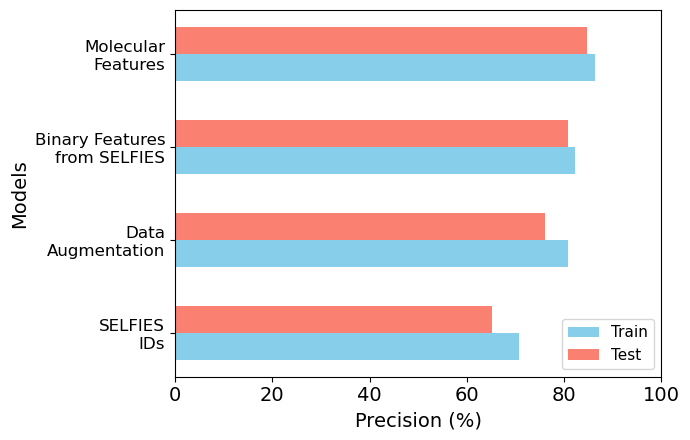

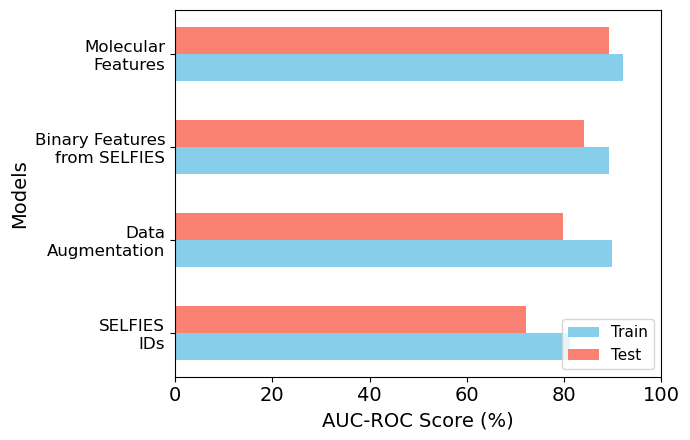

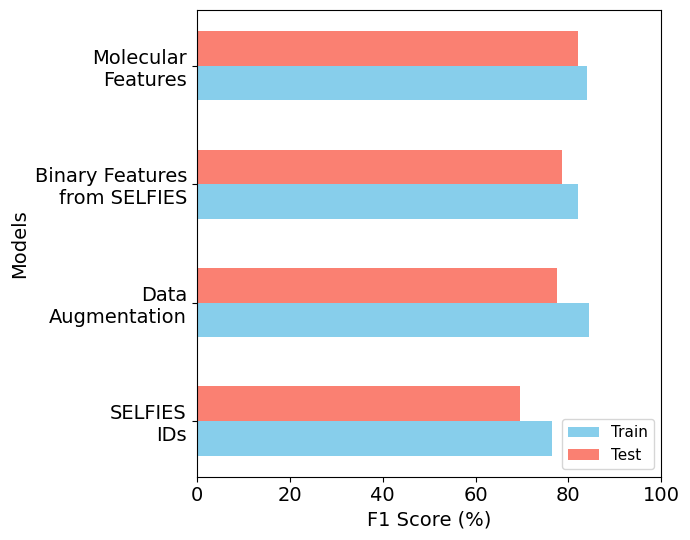

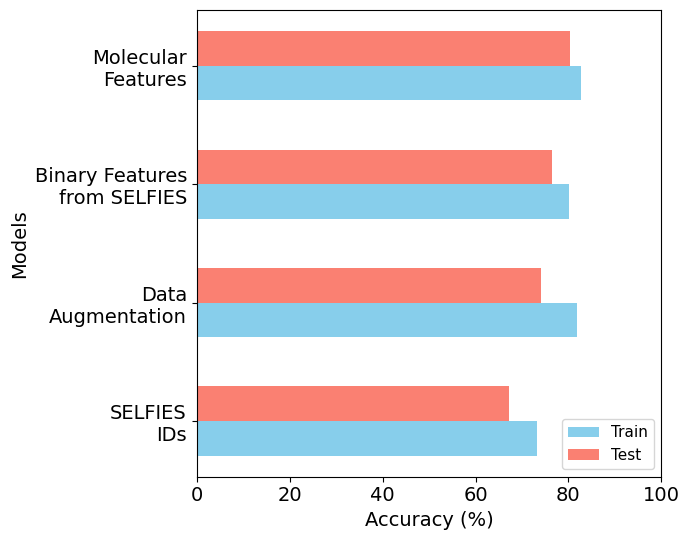

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Updated model names with longer labels
model_names = ['SELFIES\nIDs', 'Data\nAugmentation', 'Binary Features\nfrom SELFIES', 'Molecular\nFeatures']

# Scores for each model, scaled to percentage (multiply by 100)
scores = [
    [70.81, 65.12, 81.19, 72.12, 76.41, 69.65, 73.25, 67.2],
    [80.8, 76.07, 89.94, 79.73, 84.33, 77.44, 81.88, 74.17],
    [82.24, 80.78, 89.31, 84.17, 81.99, 78.54, 80.14, 76.52],
    [86.31, 84.78, 92.02, 89.28, 83.94, 81.98, 82.71, 80.39]
]

# Bar width and spacing between model names
height = 0.35
y = np.arange(len(model_names)) * 1.2  # Adjusted spacing for horizontal layout

# Plotting each metric in separate horizontal bar plots
# Precision
fig, ax = plt.subplots(figsize=(7, 4.5))
precision_train = [scores[i][0] for i in range(4)]
precision_test = [scores[i][1] for i in range(4)]
ax.barh(y - height / 2, precision_train, height, label='Train', color='skyblue')
ax.barh(y + height / 2, precision_test, height, label='Test', color='salmon')
ax.set_ylabel('Models', fontsize=14)
ax.set_xlabel('Precision (%)', fontsize=14)
ax.set_xlim(0, 100)  # Set x-axis limit to 100 for percentage
ax.set_yticks(y)
ax.set_yticklabels(model_names, fontsize=12)
ax.legend(loc='lower right', fontsize=11)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# plt.title('Precision Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.show()

# AUC-ROC
fig, ax = plt.subplots(figsize=(7, 4.5))
auc_roc_train = [scores[i][2] for i in range(4)]
auc_roc_test = [scores[i][3] for i in range(4)]
ax.barh(y - height / 2, auc_roc_train, height, label='Train', color='skyblue')
ax.barh(y + height / 2, auc_roc_test, height, label='Test', color='salmon')
ax.set_ylabel('Models', fontsize=14)
ax.set_xlabel('AUC-ROC Score (%)', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks(y)
ax.set_yticklabels(model_names, fontsize=12)
ax.legend(loc='lower right', fontsize=11)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# plt.title('AUC-ROC Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.show()

# F1 Score
fig, ax = plt.subplots(figsize=(7, 5.5))
f1_train = [scores[i][4] for i in range(4)]
f1_test = [scores[i][5] for i in range(4)]
ax.barh(y - height / 2, f1_train, height, label='Train', color='skyblue')
ax.barh(y + height / 2, f1_test, height, label='Test', color='salmon')
ax.set_ylabel('Models', fontsize=14)
ax.set_xlabel('F1 Score (%)', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks(y)
ax.set_yticklabels(model_names, fontsize=10)
ax.legend(loc='lower right', fontsize=11)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('F1 Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(7, 5.5))
accuracy_train = [scores[i][6] for i in range(4)]
accuracy_test = [scores[i][7] for i in range(4)]
ax.barh(y - height / 2, accuracy_train, height, label='Train', color='skyblue')
ax.barh(y + height / 2, accuracy_test, height, label='Test', color='salmon')
ax.set_ylabel('Models', fontsize=14)
ax.set_xlabel('Accuracy (%)', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks(y)
ax.set_yticklabels(model_names, fontsize=10)
ax.legend(loc='lower right', fontsize=11)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Accuracy Scores for Different Models', fontsize=16)
plt.tight_layout()
plt.show()


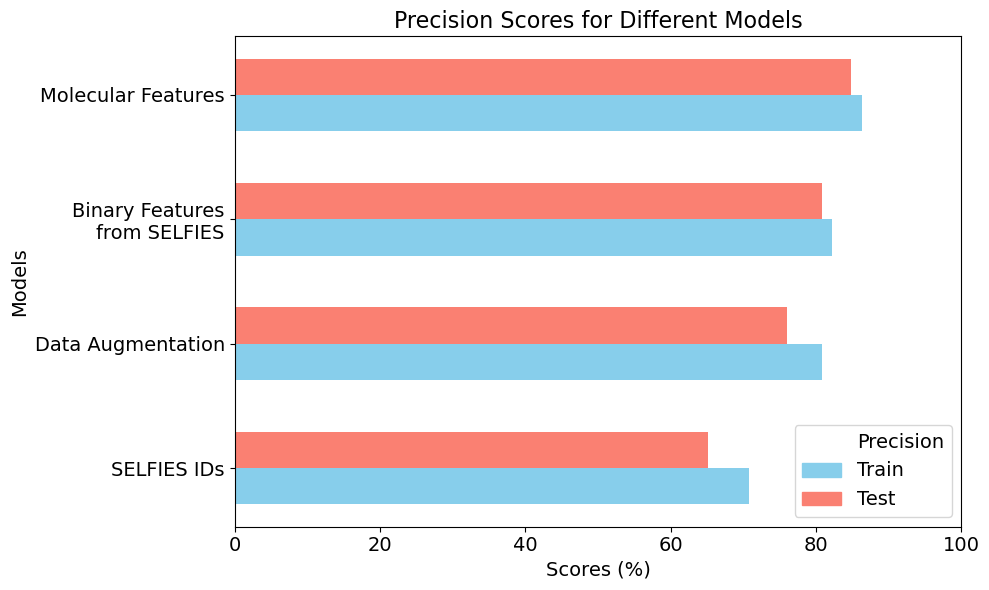

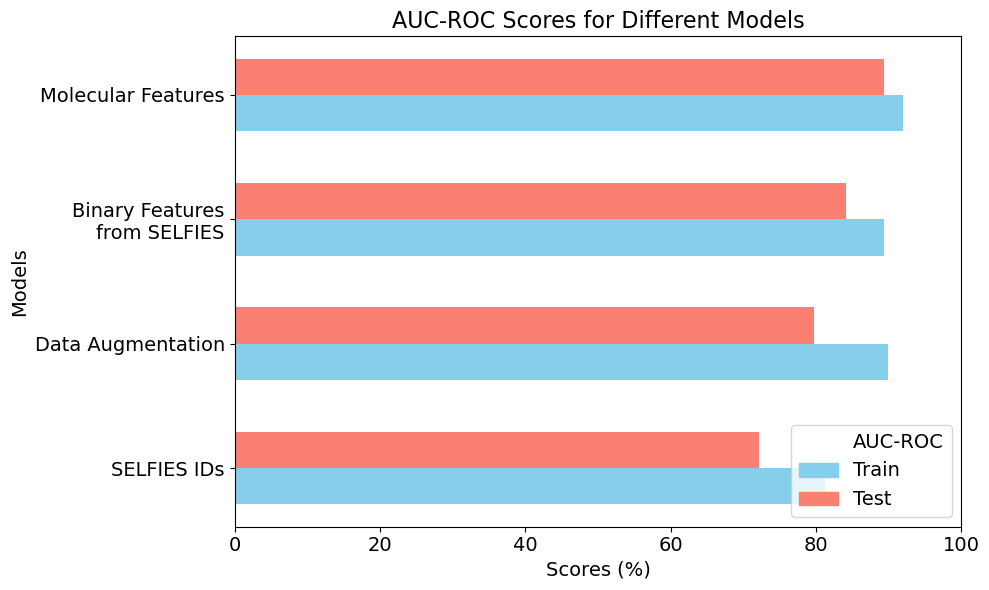

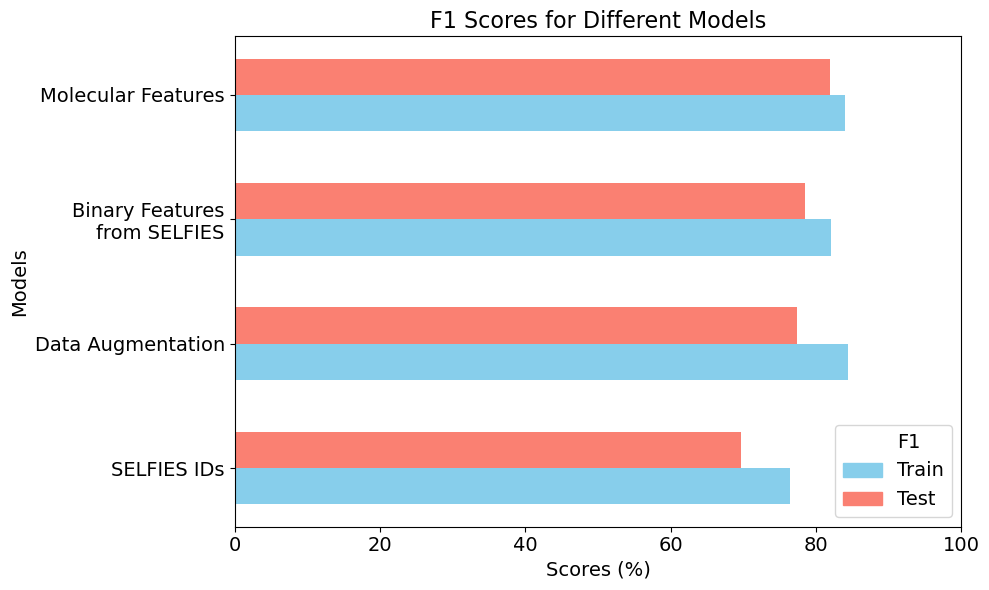

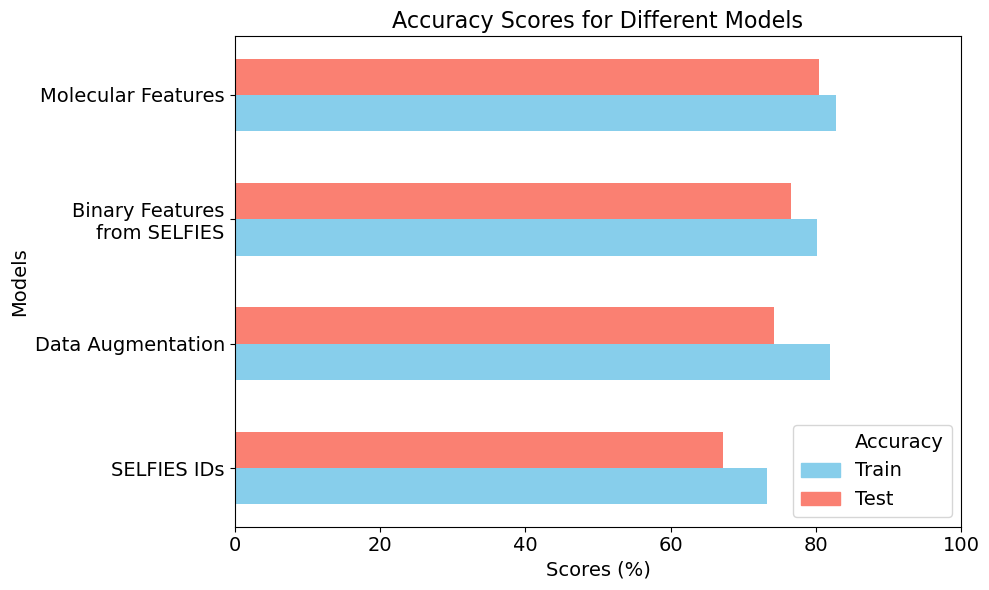

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Updated model names with longer labels split into two lines
model_names = ['SELFIES IDs', 'Data Augmentation', 'Binary Features\nfrom SELFIES', 'Molecular Features']

# Scores for each model, scaled to percentage (multiply by 100)
scores = [
    [70.81, 65.12, 81.19, 72.12, 76.41, 69.65, 73.25, 67.2],
    [80.8, 76.07, 89.94, 79.73, 84.33, 77.44, 81.88, 74.17],
    [82.24, 80.78, 89.31, 84.17, 81.99, 78.54, 80.14, 76.52],
    [86.31, 84.78, 92.02, 89.28, 83.94, 81.98, 82.71, 80.39]
]

# Bar height and spacing between model names
height = 0.35
y = np.arange(len(model_names)) * 1.2  # Adjusted spacing for horizontal layout

# Custom function to create each figure with customized legend
def create_figure(title, train_data, test_data, main_label):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(y - height / 2, train_data, height, label='Train', color='skyblue')
    ax.barh(y + height / 2, test_data, height, label='Test', color='salmon')
    ax.set_ylabel('Models', fontsize=14)
    ax.set_xlabel('Scores (%)', fontsize=14)
    ax.set_xlim(0, 100)
    ax.set_yticks(y)
    ax.set_yticklabels(model_names, fontsize=12)

    # Custom legend with main label and sublabels
    legend_elements = [Patch(color='none', label=main_label),  # Main label without color
                       Patch(color='skyblue', label='Train'),
                       Patch(color='salmon', label='Test')]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot each figure
# Precision
create_figure('Precision Scores for Different Models', 
              [scores[i][0] for i in range(4)], 
              [scores[i][1] for i in range(4)], 
              'Precision')

# AUC-ROC
create_figure('AUC-ROC Scores for Different Models', 
              [scores[i][2] for i in range(4)], 
              [scores[i][3] for i in range(4)], 
              'AUC-ROC')

# F1 Score
create_figure('F1 Scores for Different Models', 
              [scores[i][4] for i in range(4)], 
              [scores[i][5] for i in range(4)], 
              'F1')

# Accuracy
create_figure('Accuracy Scores for Different Models', 
              [scores[i][6] for i in range(4)], 
              [scores[i][7] for i in range(4)], 
              'Accuracy')


### Cross-validation scores

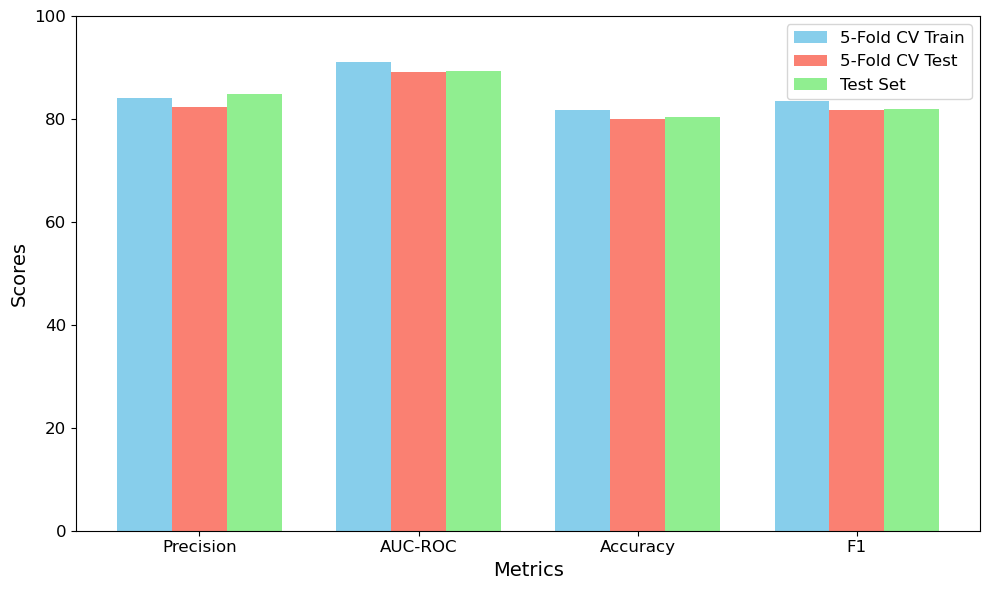

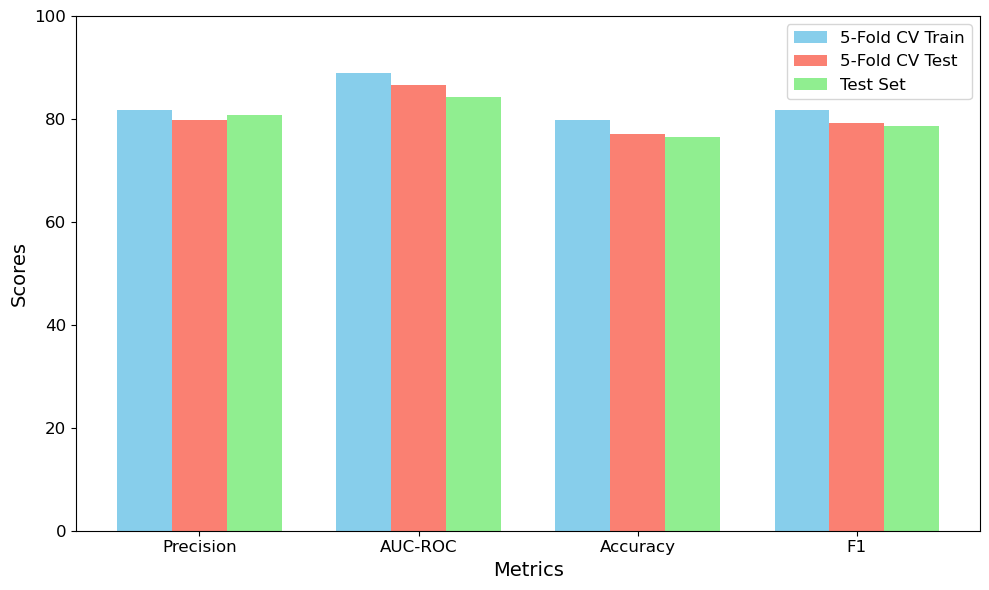

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Molecular Features', 'Binary SELFIES IDs']

# Metrics data for each model
metrics = ['Precision', 'AUC-ROC', 'Accuracy', 'F1']
train_scores_model1 = [0.8413, 0.9102, 0.8182, 0.8343]
test_scores_model1 = [0.8230, 0.8907, 0.7996, 0.8177]
final_test_scores_model1 = [0.8478, 0.8928, 0.8039, 0.8198]

train_scores_model1 = [score * 100 for score in train_scores_model1]
test_scores_model1 = [score * 100 for score in test_scores_model1]
final_test_scores_model1 = [score * 100 for score in final_test_scores_model1]

train_scores_model2 = [0.8173, 0.8892, 0.7973, 0.8165]
test_scores_model2 = [0.7970, 0.8658, 0.7713, 0.7919]
final_test_scores_model2 = [0.8078, 0.8417, 0.7652, 0.7854]

train_scores_model2 = [score * 100 for score in train_scores_model2]
test_scores_model2 = [score * 100 for score in test_scores_model2]
final_test_scores_model2 = [score * 100 for score in final_test_scores_model2]

# Bar width and x-axis positions
width = 0.25
x = np.arange(len(metrics))

# Plotting for Model 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, train_scores_model1, width, label='5-Fold CV Train', color='skyblue')
ax.bar(x, test_scores_model1, width, label='5-Fold CV Test', color='salmon')
ax.bar(x + width, final_test_scores_model1, width, label='Test Set', color='lightgreen')
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_ylim(0, 100)
# ax.set_title('Cross-Validation and Test Scores - Model 1: Molecular Features', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plotting for Model 2
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, train_scores_model2, width, label='5-Fold CV Train', color='skyblue')
ax.bar(x, test_scores_model2, width, label='5-Fold CV Test', color='salmon')
ax.bar(x + width, final_test_scores_model2, width, label='Test Set', color='lightgreen')
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_ylim(0, 100)
# ax.set_title('Cross-Validation and Test Scores - Model 2: Binary SELFIES IDs', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#### AUC-ROC

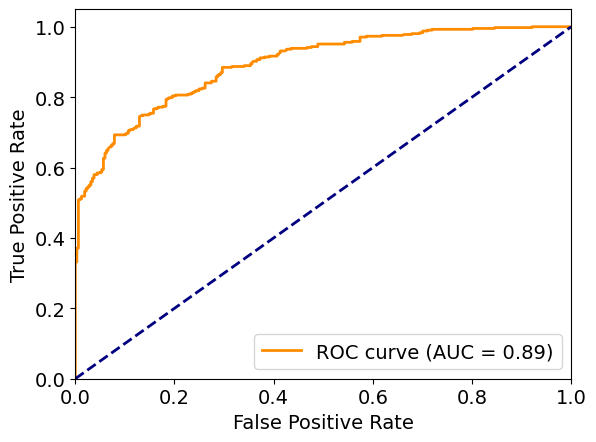

<Figure size 800x600 with 0 Axes>

In [16]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved model
with open('updated_model_XGBoost_MolFeatures_Oct23.pkl', 'rb') as f:
    updated_model = pickle.load(f)

# Predict probabilities on test data
y_pred_proba = updated_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_All, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Customize plot with increased font size
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('AUC-ROC Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.xticks(fontsize=14)  # Set font size for x-axis numbers
plt.yticks(fontsize=14)  # Set font size for y-axis numbers

plt.figure(figsize=(8, 6))

plt.show()


#### SHAP (SHapley Additive exPlanations)

In [155]:
test_df.shape

(724, 226)

In [59]:
import shap
print(shap.__version__)


0.46.0


In [14]:
import shap

# Create SHAP explainer (TreeExplainer for tree-based models like RandomForest or XGBoost)
explainer = shap.TreeExplainer(updated_model)

# Assume X_test_scaled contains your test dataset with SMILES embeddings
shap_values = explainer.shap_values(X_test_scaled)


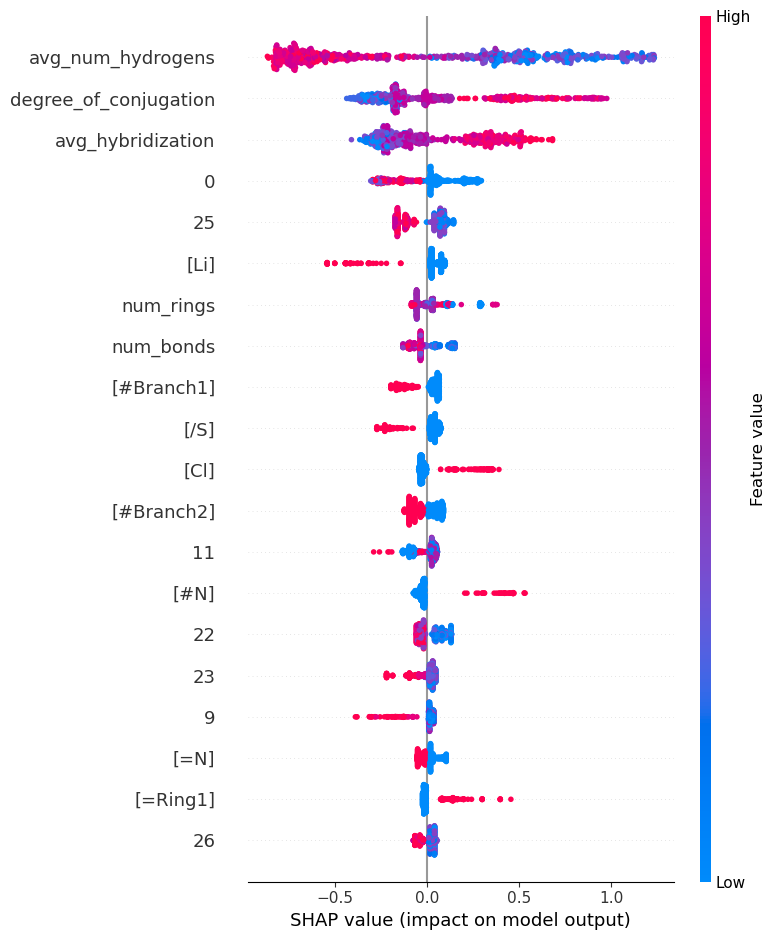

In [12]:
feature_names = X_test_All.columns.tolist()
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)


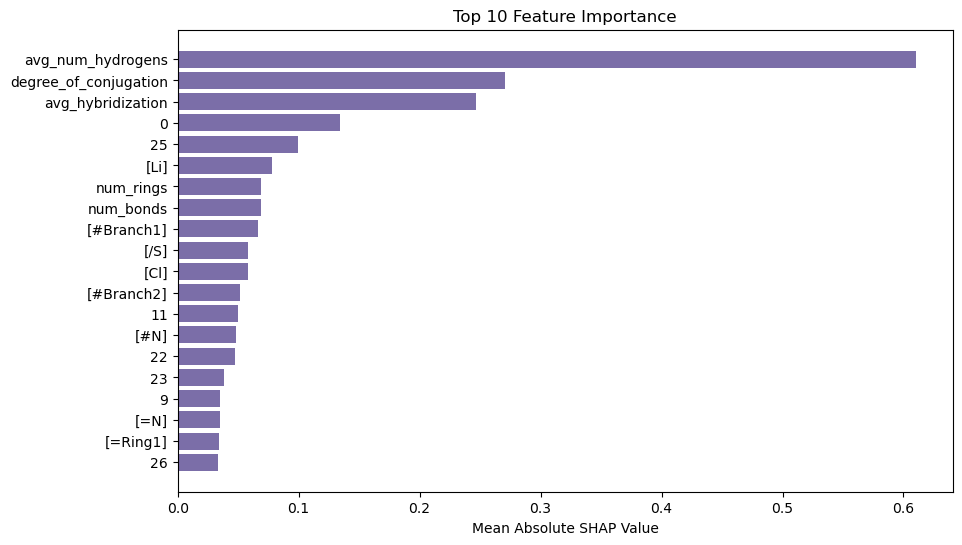

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame({
    'feature': X_test_All.columns,
    'importance': np.abs(shap_values).mean(axis=0)
})

# Sort by importance and select the top 10 features
top_20_features = feature_importance.sort_values(by='importance', ascending=False).head(20)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['feature'], top_20_features['importance'], color='#7b6ea8')
plt.gca().invert_yaxis()
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Feature Importance")
plt.show()


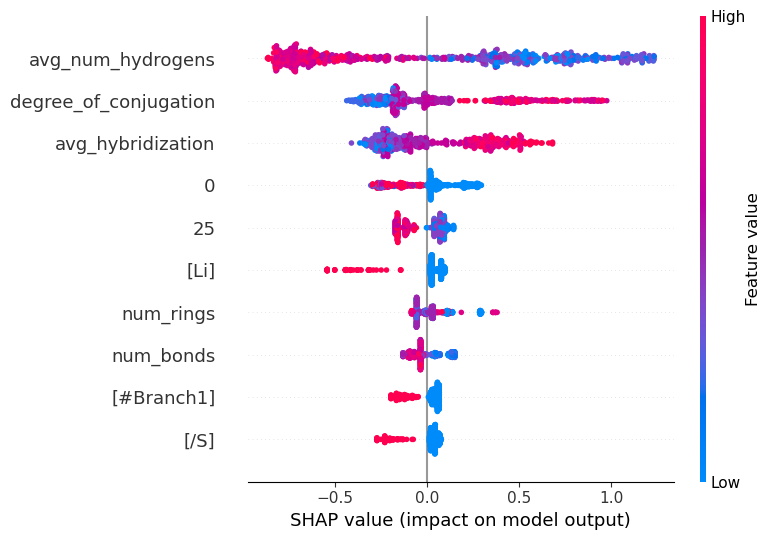

In [13]:
feature_names = X_test_All.columns.tolist()
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, max_display=10)


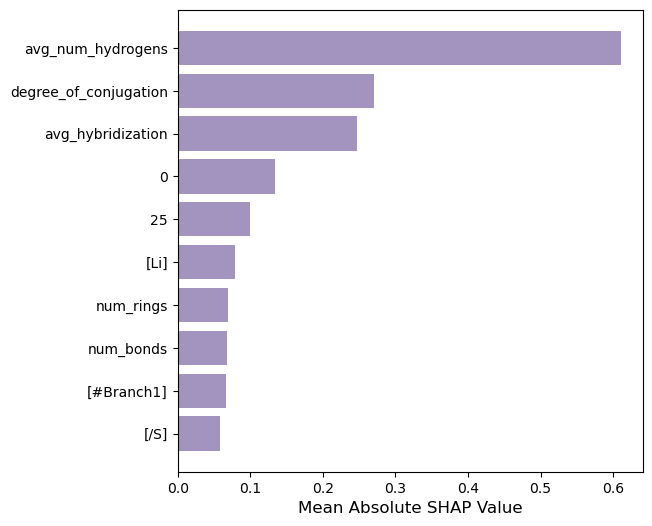

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame({
    'feature': X_test_All.columns,
    'importance': np.abs(shap_values).mean(axis=0)
})

# Sort by importance and select the top 10 features
top_10_features = feature_importance.sort_values(by='importance', ascending=False).head(10)

# Plot the feature importance
plt.figure(figsize=(6, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='#a393bf')
plt.gca().invert_yaxis()
plt.xlabel("Mean Absolute SHAP Value", fontsize=12)
plt.show()


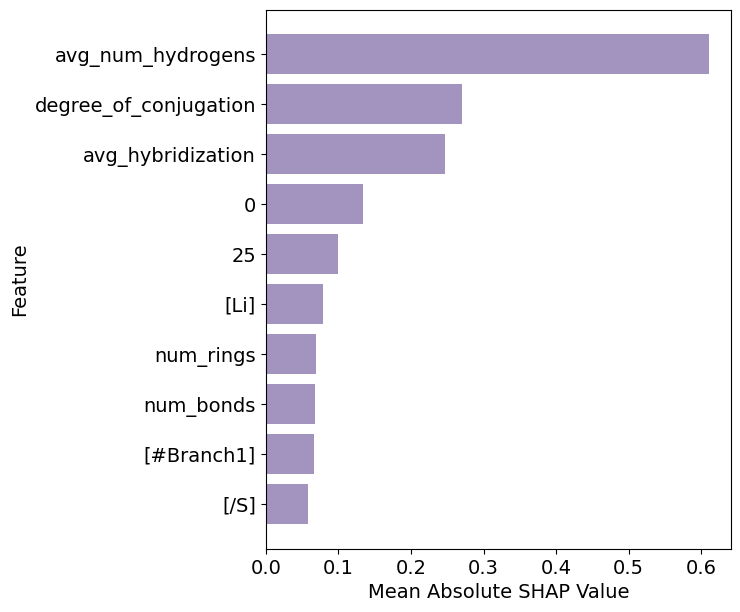

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np

# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame({
    'feature': X_test_All.columns,
    'importance': np.abs(shap_values).mean(axis=0)
})

# Sort by importance and select the top 10 features
top_10_features = feature_importance.sort_values(by='importance', ascending=False).head(10)

# Plot the feature importance with adjusted font sizes
plt.figure(figsize=(6, 7))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='#a393bf')
plt.gca().invert_yaxis()

# Set font size for labels and title
plt.xlabel("Mean Absolute SHAP Value", fontsize=14)
plt.ylabel("Feature", fontsize=14)

# Set font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


##### Top 10 features and Voltage correlation heatmap

In [60]:
IDs_All.head()

,0,1,2,3,4,5,6,7,8,9,...,target,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,38,12,26,12,26,10,26,15,26,12,...,1,3.142857,0.285714,14,15,1,227.046,0,2,9
1,38,12,26,12,22,26,27,26,10,26,...,1,3.176471,0.058824,17,18,1,291.473,0,2,15
2,30,38,26,22,40,38,30,26,12,22,...,0,3.000000,0.133333,30,31,0,435.930,12,2,3
3,30,43,26,12,26,22,26,28,12,22,...,0,3.000000,0.166667,12,12,1,190.094,2,1,6
4,26,38,26,12,22,40,38,26,26,12,...,1,3.264706,0.705882,34,36,1,512.562,7,3,18


In [65]:
mol_features_all = IDs_All.copy()

In [67]:
mol_features_all.shape

(4073, 236)

In [68]:
mol_features_all["Voltage"] = df_All["Voltage"]

In [69]:
mol_features_all.shape

(4073, 237)

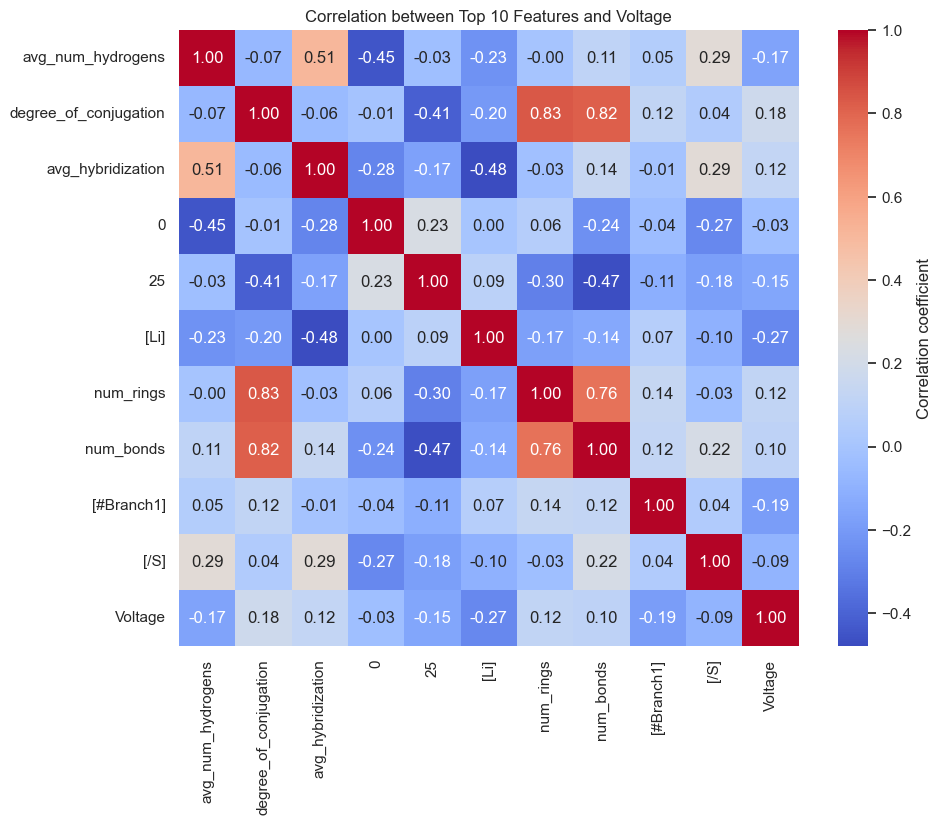

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the top 10 features and the target variable 'voltage'
top_features = ['avg_num_hydrogens', 'degree_of_conjugation', 'avg_hybridization', '0', '25', 
                '[Li]', 'num_rings', 'num_bonds', '[#Branch1]', '[/S]', 'Voltage']

# Filtering the dataframe for the selected features
data_for_correlation = mol_features_all[top_features]

# Calculating the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation coefficient'})
plt.title("Correlation between Top 10 Features and Voltage")
plt.show()


The difference between features that have SHAP values stretching out (like avg_num_hydrogens) and those that accumulate near 0 (like [#Branch2]) can be understood in terms of feature importance and how consistently that feature impacts predictions. Here's how to interpret it:

1. SHAP Values Stretching Out (e.g., avg_num_hydrogens):
What it means: When SHAP values for a feature like avg_num_hydrogens stretch far to the left or right, it suggests that this feature strongly influences the predictions for many samples.
High feature importance: The large spread of SHAP values means that changes in this feature can either increase or decrease the model output significantly.
Variability in impact: The fact that dots are spread out means the feature's impact on predictions varies a lot depending on its value. For avg_num_hydrogens, higher values (red) tend to increase the prediction, while lower values (blue) decrease it. This makes it a key predictor in the model.
Interpretation: avg_num_hydrogens is an important feature, with both positive and negative SHAP values. It contributes differently depending on the molecule's hydrogen count, making its impact on the model output more variable across samples.
2. SHAP Values Accumulating Near Zero (e.g., [#Branch2]):
What it means: When SHAP values for a feature like [#Branch2] are tightly clustered around zero, it suggests that this feature has minimal impact on the model’s prediction for most samples.
Low feature importance: Features whose SHAP values accumulate around zero generally do not have a strong influence on the prediction, so whether or not a sample has this feature does not change the outcome much.
Consistent behavior: For categorical features like [#Branch2] (e.g., a specific branching structure in the molecule), the impact is likely small across most samples, which is why the SHAP values are close to zero. In other words, this feature doesn't provide much differentiating power for the model.
Interpretation: [#Branch2] has little effect on the model output. The presence or absence of this branching structure doesn't significantly change the predictions, indicating it’s a less important feature for the model.
Summary:
Stretching SHAP values (like avg_num_hydrogens): Indicates that the feature is highly important and has a strong, variable impact on model predictions. These features have a large influence on the outcome.
Accumulating SHAP values near zero (like [#Branch2]): Indicates that the feature has minimal impact on predictions for most samples, and thus has low importance in the model.
Features with stretched SHAP values are driving the predictions, while features with SHAP values near zero are contributing less to the model's decisions.